In [13]:
import tensorflow as tf   #For CNN

#Loading dataset:
mnist= tf.keras.datasets.mnist  #27*28 images of hand written digits 0-9 
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
print(x_train[0]) #► it is not normal

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
#normalizing the dataset:
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

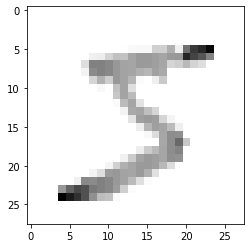

In [4]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [5]:
print(x_train[0]) #► it is not normal

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building Model:

In [8]:
model= tf.keras.models.Sequential() #Input Layer          #sequential is the most common model (CNN)
model.add(tf.keras.layers.Flatten()) #Hidden Layer layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) #Dense layer      #128 units in the layer #default activation layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) #2nd Dense Layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) #Output Layer  #number of classification ► 10 (0-9)

#tuning parameters for our model on training dataset:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#fit the model on train data:
model.fit(x_train, y_train, epochs=3) #epochs► number of iteration


Epoch 1/3
1875/1875 [==============================] - 16s 2ms/step - loss: 0.2572 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0706 - accuracy: 0.9779


In [9]:
val_loss, val_acc= model.evaluate(x_test, y_test)  #iy\t is close to epoch3 ► not overfitted!

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9708


In [10]:
model.save('Saber.model')

Assets written to: Saber.model\assets


In [15]:
new_model= tf.keras.models.load_model('Saber.model')

In [16]:
Predictions= new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [17]:
print (Predictions) #► it's messy!

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
import numpy as np

print(np.argmax(Predictions[1]))

2


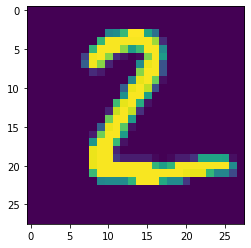

In [21]:
plt.imshow(x_test[1])
plt.show()